## 7 Python Libraries That Make Visualization Beautiful

Charts so good they look designed

#### 1. PyWaffle — Waffle Charts Made Stupid-Simple
Waffle charts are underrated: they show proportions like a heatmap of little squares.

In [3]:
# %pip install pywaffle matplotlib

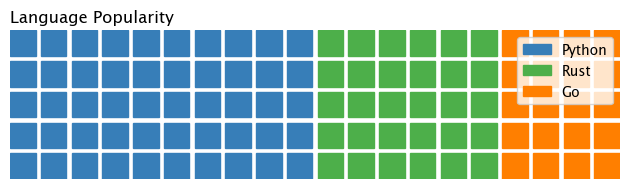

In [4]:
import matplotlib.pyplot as plt
from pywaffle import Waffle

data = {'Python': 50, 'Rust': 30, 'Go': 20}

fig = plt.figure(
    FigureClass=Waffle,
    rows=5,
    values=data,
    colors=("#377eb8", "#4daf4a", "#ff7f00"),
    title={'label': 'Language Popularity', 'loc': 'left'}
)
plt.show()

#### 2. Plotnine — The Grammar of Graphics for Python
Most people think ggplot2 exists only in R. Plotnine is its secret twin in Python.

In [6]:
# %pip install plotnine pandas

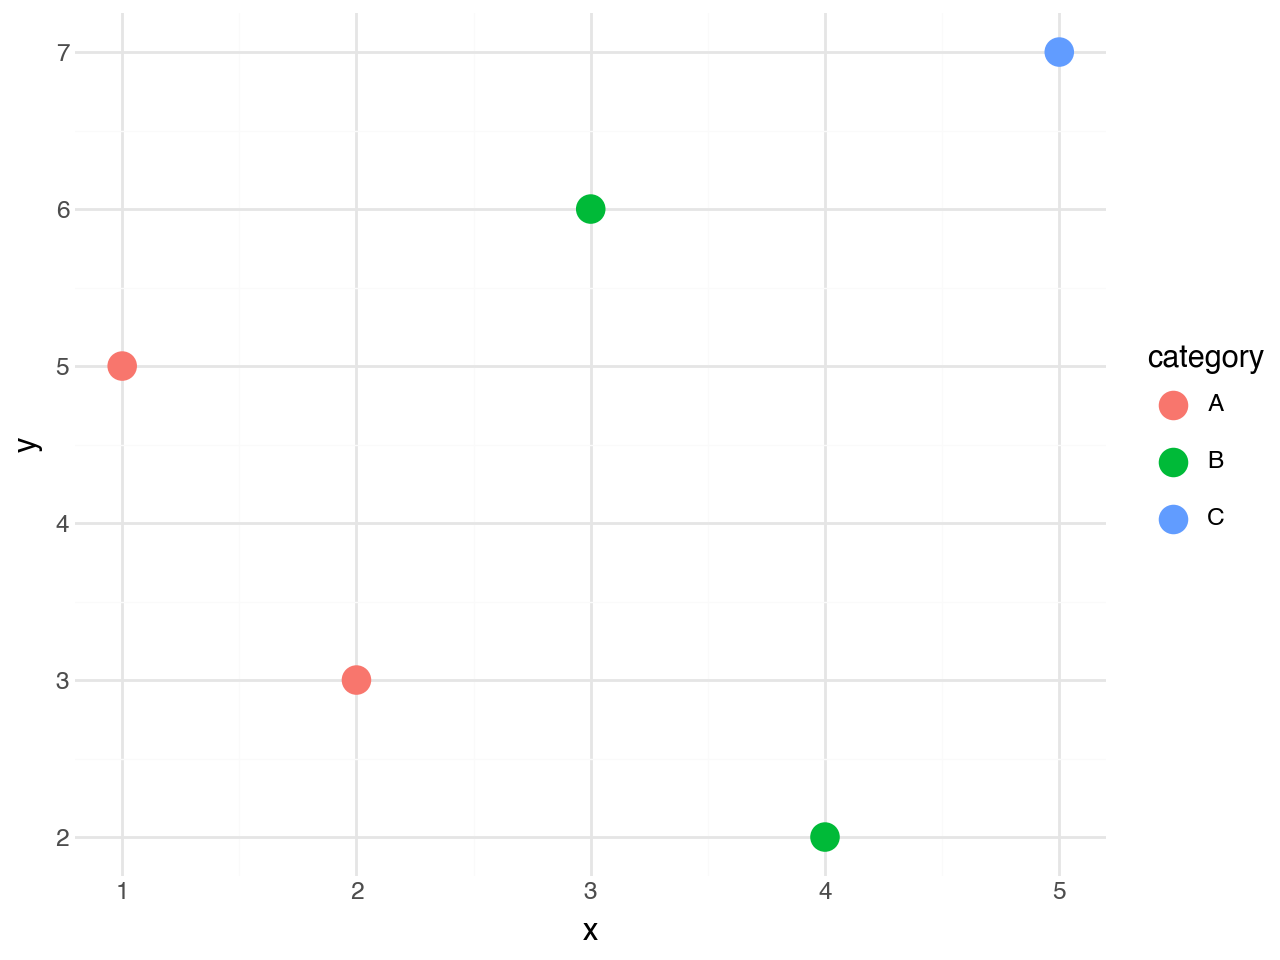

In [7]:
import pandas as pd
from plotnine import ggplot, aes, geom_point, theme_minimal

df = pd.DataFrame({
    'x': [1,2,3,4,5],
    'y': [5,3,6,2,7],
    'category': ['A','A','B','B','C']
})

(ggplot(df, aes('x', 'y', color='category'))
 + geom_point(size=5)
 + theme_minimal())

#### 3. Datashader — Plot Millions of Points Without Melting
Scatterplots of 2 million rows? Matplotlib will cry. Datashader renders them in milliseconds.

In [9]:
# %pip install datashader

In [12]:
import pandas as pd
import datashader as ds
import datashader.transfer_functions as tf
import numpy as np

n = 1_000_000
df = pd.DataFrame({'x': np.random.randn(n), 'y': np.random.randn(n)})

canvas = ds.Canvas(plot_width=600, plot_height=600)
agg = canvas.points(df, 'x', 'y')
img = tf.shade(agg, cmap=["lightblue", "darkblue"])
img.to_pil().show()

# show()

#### 4. JoyPy — Ridgeline Plots Without the Pain
Ridgeline plots (those stacked density plots) look like an indie magazine cover. JoyPy makes them one-liner.

In [14]:
# %pip install joypy

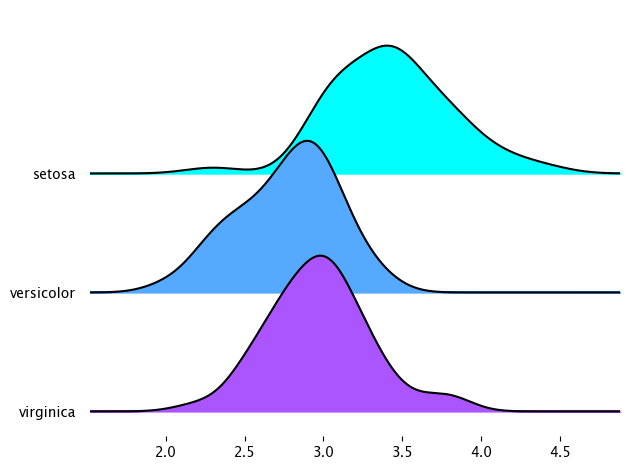

In [15]:
import seaborn as sns
from joypy import joyplot
import matplotlib.pyplot as plt

df = sns.load_dataset('iris')
joyplot(
    data=df,
    by="species",
    column="sepal_width",
    colormap=plt.cm.cool
)
plt.show()

#### 5. Sankeyview — Interactive Sankey Diagrams in the Browser
Most Sankey libraries are either R-only or JavaScript pain. Sankeyview is pure Python with smooth interactivity.

In [17]:
# %pip install sankeyview

In [18]:
import sankeyview as sv

nodes = ['Start', 'Step1', 'Step2', 'End']
links = [('Start', 'Step1', 10), ('Step1', 'Step2', 7), ('Step2', 'End', 5)]

spec = sv.Spec(nodes=nodes, links=links)
diagram = sv.render(spec)
diagram  # in Jupyter shows an interactive diagram

ImportError: cannot import name 'gcd' from 'fractions' (/opt/homebrew/Cellar/python@3.13/3.13.8/Frameworks/Python.framework/Versions/3.13/lib/python3.13/fractions.py)

#### 6. PyCirclize — Circos-Style Circular Visualizations
You’ve seen those genomic circular charts in science papers? You can do that in Python.

In [20]:
# %pip install pycirclize

In [1]:
from pycirclize import Circos

circos = Circos(sectors=["A", "B", "C"])
for sector in circos.sectors:
    sector.text(sector.name)

track = circos.add_track((0.8, 1.0))
track.bar([10, 20, 30], color="skyblue")
circos.plotfig()

AttributeError: 'list' object has no attribute 'items'

#### 7. Weave — GPU-Powered Interactive Dashboards
Hidden gem from the RAPIDS ecosystem. Weave binds your pandas/cuDF data into a live dashboard without a line of JS.

In [5]:
# %pip install weave
# %pip install cudf

In [6]:
import cudf
import weave

df = cudf.DataFrame({'x':[1,2,3,4], 'y':[10,20,30,40]})
weave.show(df)  # opens an interactive browser UI instantly

ModuleNotFoundError: No module named 'cudf'

In [1]:
# import libraries
import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

## Heart dataset

In [1]:
heart = pd.read_csv('heart.csv')

heart.head()

NameError: name 'pd' is not defined

We can see that the dataset contains 14 columns, including the target column (output), which indicates whether or not the patient had a heart attack. Now let’s start creating visualizations.

#### Data cleaning and preprocessing
The purpose of data cleaning is to get our data ready to analyze and visualize.

In [ ]:
# check if there are any Null values
heart.isnull().sum().sort_values(ascending=False).head(11)


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
dtype: int64

In [ ]:
# check duplicated values
heart.duplicated().sum()

np.int64(0)

In [ ]:
# drop duplicated values
heart.drop_duplicates(keep='first',inplace=True)

#### Statistics summary

In [ ]:
# getting the statistical summary of dataset
heart.describe().T

,count,mean,std,min,25%,50%,75%,max
age,302.0,54.420530,9.047970,29.0,48.00,55.5,61.00,77.0
sex,302.0,0.682119,0.466426,0.0,0.00,1.0,1.00,1.0
cp,302.0,0.963576,1.032044,0.0,0.00,1.0,2.00,3.0
trestbps,302.0,131.602649,17.563394,94.0,120.00,130.0,140.00,200.0
chol,302.0,246.500000,51.753489,126.0,211.00,240.5,274.75,564.0
fbs,302.0,0.149007,0.356686,0.0,0.00,0.0,0.00,1.0
restecg,302.0,0.526490,0.526027,0.0,0.00,1.0,1.00,2.0
thalach,302.0,149.569536,22.903527,71.0,133.25,152.5,166.00,202.0
exang,302.0,0.327815,0.470196,0.0,0.00,0.0,1.00,1.0
oldpeak,302.0,1.043046,1.161452,0.0,0.00,0.8,1.60,6.2


#### Data visualization & Interpretation
Gender-based data visualization

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

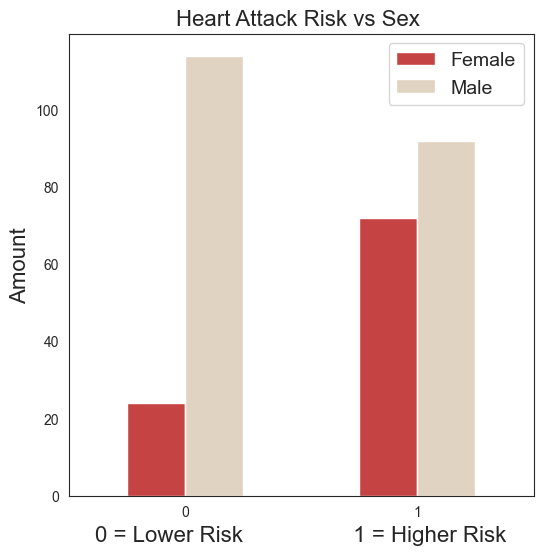

In [ ]:
# Compare Heart Attack vs Sex 
df = pd.crosstab(heart['target'],heart['sex'])
sns.set_style("white")

df.plot(kind="bar",
        figsize=(6,6),
        color=['#c64343', '#e1d3c1']);

plt.title("Heart Attack Risk vs Sex ", fontsize=16)
plt.xlabel("0 = Lower Risk                  1 = Higher Risk", fontsize=16)
plt.ylabel("Amount", fontsize=16)
plt.legend(["Female","Male"], fontsize=14)
plt.xticks(rotation=0)

In [ ]:
fig = px.pie(heart,
            names= "sex",
            template= "presentation",
            hole= 0.6,
            color_discrete_sequence=['#e1d3c1', '#c64343']
            #color_discrete_sequence=px.colors.sequential.RdBu
            )

# layout
fig.update_layout(title_text='Gender Distribution',
                  title_x=0.5,
                  font=dict( size=18),
                  autosize=False,
                  width=500,
                  height=500,
                  showlegend=False)

fig.add_annotation(dict(x=0.5, y=0.5,  align='center',
                        xref = "paper", yref = "paper",
                        showarrow = False, font_size=22,
                        text="<span style='font-size: 26px; color=#555; font-family:Arial'>Gender<br></span>"))

fig.update_traces(textposition='outside',  textinfo='percent+label', rotation=20)
fig.show()

Interpretation: Males have a higher risk of heart attack.

Age-based data visualization

/var/folders/1_/6h4xg3ts1cd8htbp9t8wjyh40000gn/T/ipykernel_51031/60214508.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




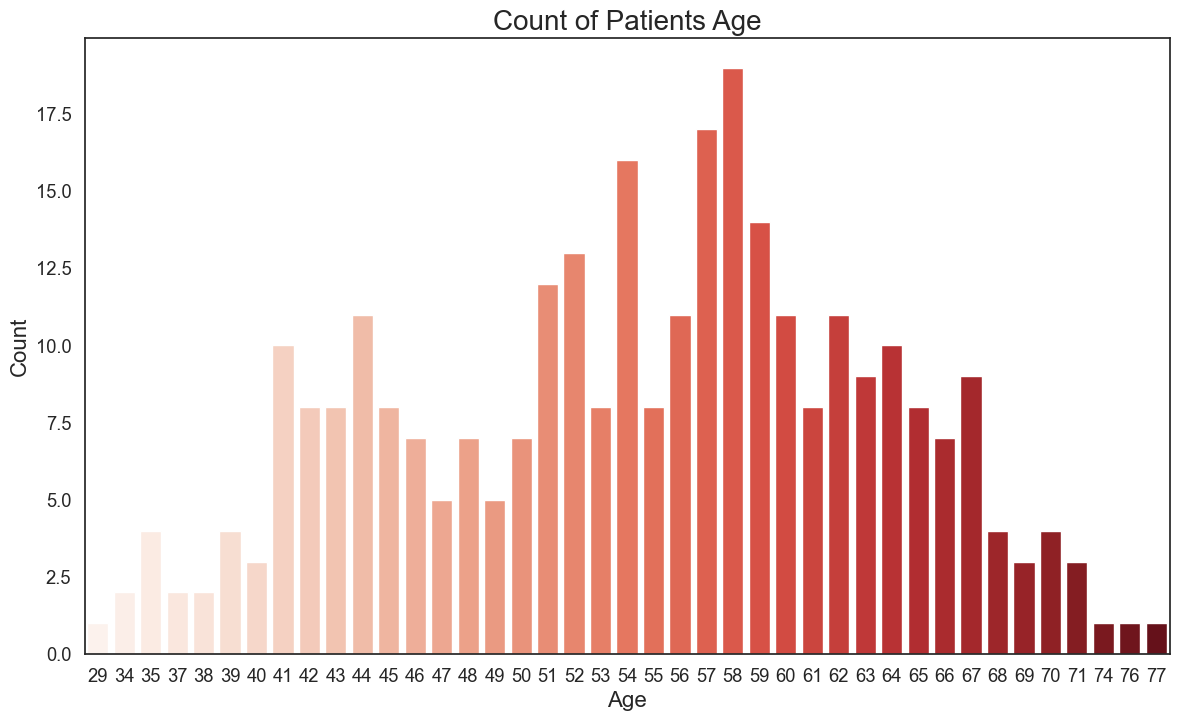

In [ ]:
plt.figure(figsize=(14,8))
sns.set(font_scale=1.2)
sns.set_style("white")

sns.countplot(x=heart["age"],
              palette='Reds')


plt.title("Count of Patients Age",fontsize=20)
plt.xlabel("Age",fontsize=16)
plt.ylabel("Count",fontsize=16)
plt.show()

/var/folders/1_/6h4xg3ts1cd8htbp9t8wjyh40000gn/T/ipykernel_51031/2653530294.py:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




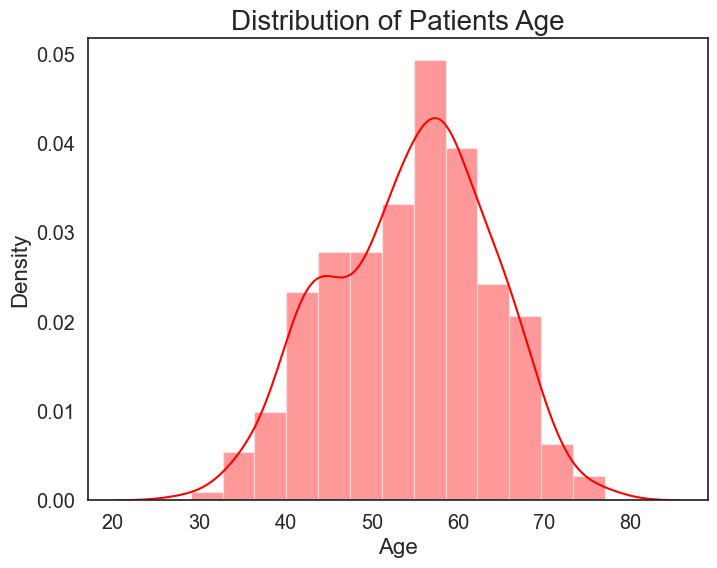

In [ ]:
# age based analysis
sns.set(font_scale=1.3)

plt.figure(figsize=(8,6))
sns.set_style("white")
sns.distplot(heart['age'],
             color='red',
             kde=True)


plt.title("Distribution of Patients Age",fontsize=20)
plt.xlabel("Age",fontsize=16)
plt.ylabel("Density",fontsize=16)
plt.show()

Interpretation: Most of the patients have age (50–60). In which the maximum number of Patients have age 58.

Cholesterol level-based data visualization

/var/folders/1_/6h4xg3ts1cd8htbp9t8wjyh40000gn/T/ipykernel_51031/3258667344.py:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/var/folders/1_/6h4xg3ts1cd8htbp9t8wjyh40000gn/T/ipykernel_51031/3258667344.py:8: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




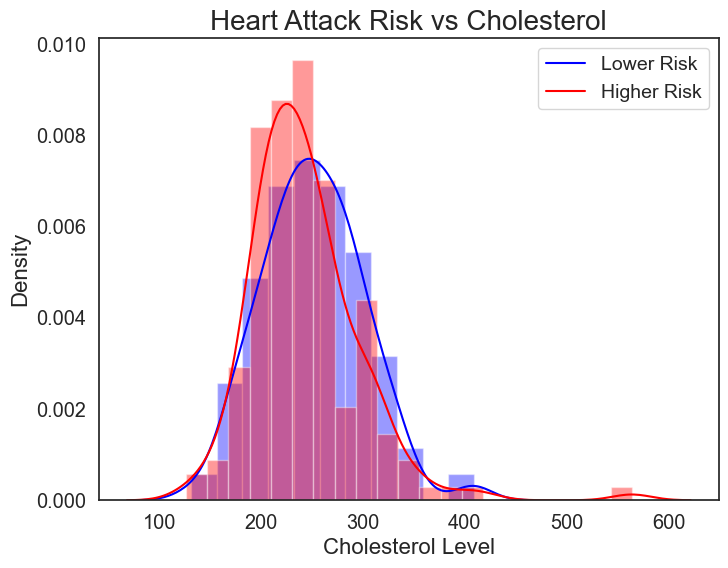

In [ ]:
# Attack vs Cholesterol analysis
sns.set(font_scale=1.3)
plt.figure(figsize=(8,6))
sns.set_style("white")

sns.distplot(heart[heart["target"]==0]["chol"],
             color="blue")
sns.distplot(heart[heart["target"]==1]["chol"],
             color="red")

plt.title("Heart Attack Risk vs Cholesterol", size=20)
plt.xlabel("Cholesterol Level", fontsize=16)
plt.ylabel("Density", fontsize=16)
plt.legend(["Lower Risk","Higher Risk"], fontsize=14)
plt.show()

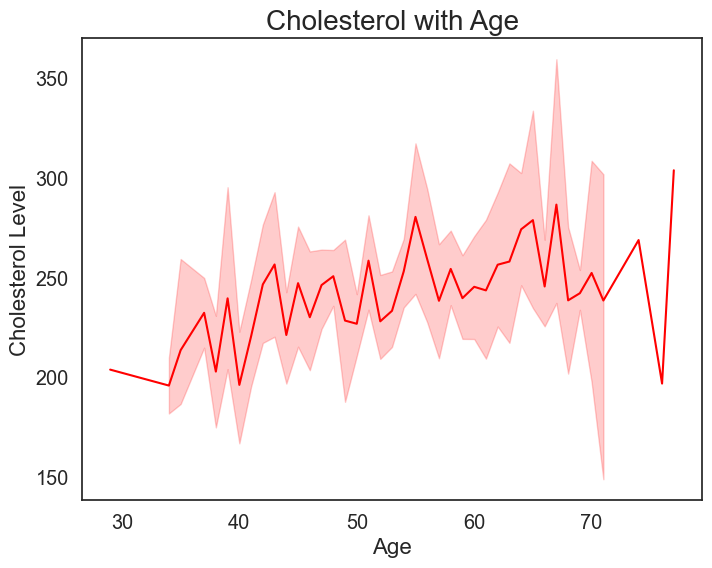

In [ ]:
plt.figure(figsize=(8,6))

sns.lineplot(y="chol",
             x="age",
             data=heart,
             color="red")
plt.title("Cholesterol with Age",fontsize=20)
plt.xlabel("Age",fontsize=16)
plt.ylabel("Cholesterol Level",fontsize=16)
plt.show()

Interpretations:

Most of the patients have cholesterol levels between 200–300.
There is a high probability of increase in the Level of Cholesterol in the body with age.
Chest Pain Type-based data visualization

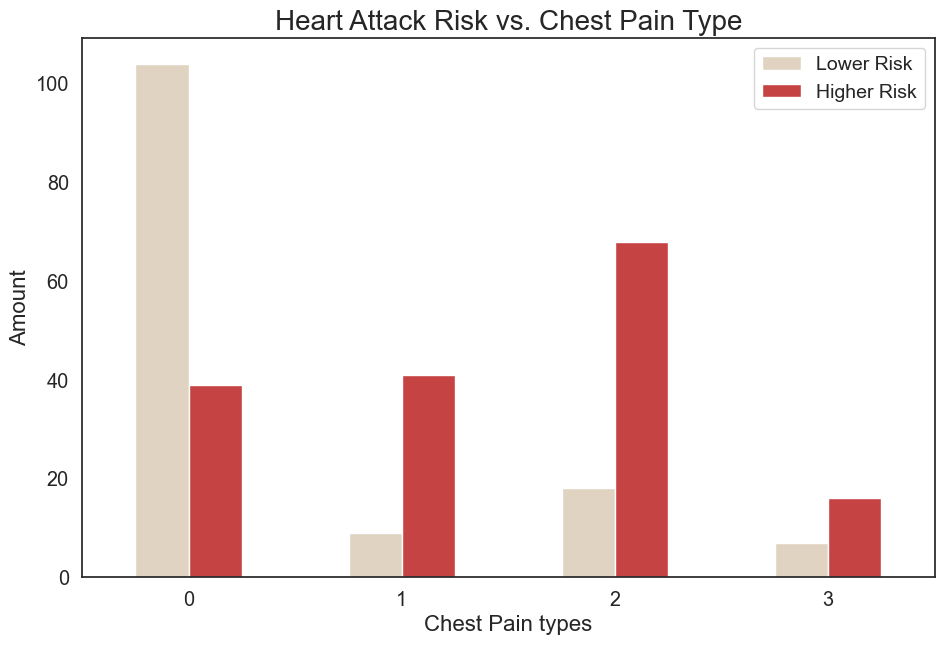

In [ ]:
# Relation of Heart Attack with Chest Pain Type
df = pd.crosstab(heart['cp'], heart['target'])


# Make the crosstab more visual
sns.set(font_scale=1.3)
sns.set_style("white")

df.plot(kind='bar',
        figsize=(11,7),
        color=['#e1d3c1', '#c64343']);

plt.title("Heart Attack Risk vs. Chest Pain Type", fontsize=20)
plt.xlabel("Chest Pain types", fontsize=16)
plt.ylabel("Amount", fontsize=16)
plt.legend(['Lower Risk','Higher Risk'], fontsize=14)
plt.xticks(rotation=0);

Interpretations:

Most of the patients have the type of Typical Angina.
Patients with Non-anginal pain have a higher risk of heart attack.
Correlation-based data visualization


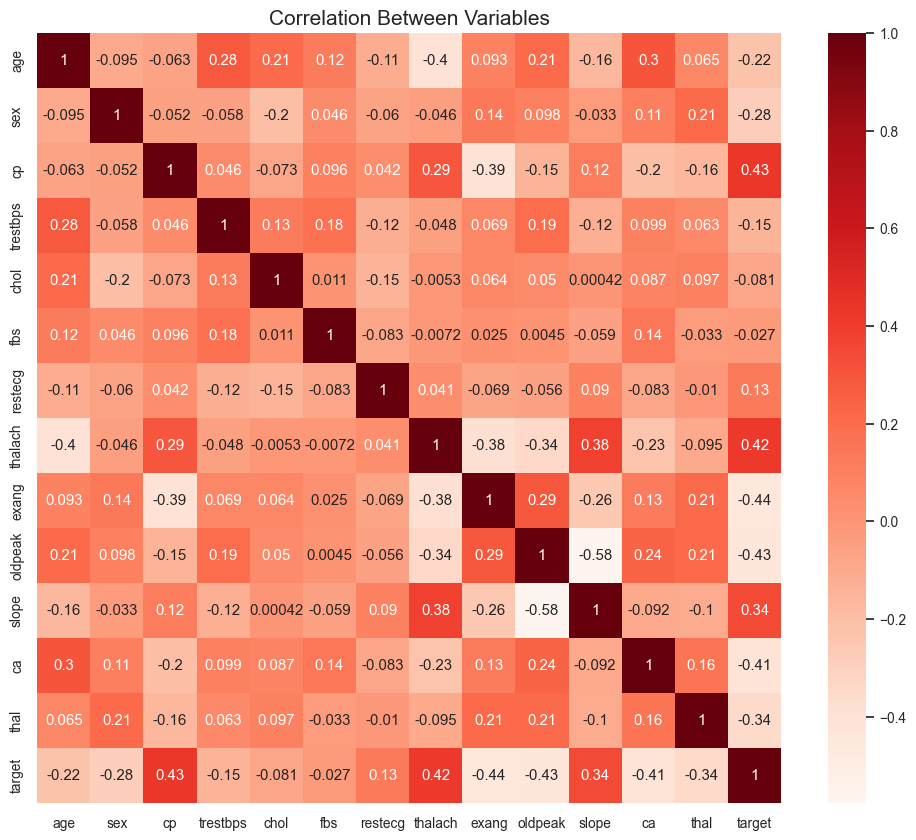

In [ ]:
plt.figure(figsize=(12,10))
sns.set(font_scale=0.9)
sns.heatmap(heart.corr(),
            annot=True,
            cmap='Reds')

plt.title("Correlation Between Variables", size=15)
plt.show()

Interpretations:

The heatmap shows us there is a correlation between

Chest Pain Type (cp) and Output
Maximum heart rate achieved (thalachh) and Output
Slope (sp) and Output
We can also see that there is a weak correlation between

oldpeak: Previous peak and output
caa: Number of major vessels and output
exng: Exercise-induced angina
Conclusion
In this post, we examined our dataset using data visualizations creating several plots like bar chart, pie chart, line chart, histogram, heatmap.

The main purpose of EDA and data visualization are to help understand data before making any assumptions. They helps us to see distribution, summary statistics, relationships between variables and outliers.

## HoloViews — Let Python Handle the Visualization Logic
Most libraries make you control every pixel. HoloViews does the opposite — you focus on data, and it decides how best to visualize it.

Why it’s special:
It auto-links with Bokeh, Matplotlib, and Plotly, creating interactive plots with zero boilerplate. Perfect for analysts who want insights, not matplotlib migraines.

Fun fact: Netflix’s internal data teams have used HoloViews-style pipelines for rapid analytics dashboards.

In [4]:
# %pip install holoviews

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
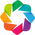

:Points   [x,y]

In [5]:
import numpy as np, holoviews as hv
hv.extension('bokeh')

data = np.random.randn(1000, 2)
hv.Points(data).opts(size=5, color='orange')

#### Datashader — When You Have More Points Than Pixels
Big data? No problem. Datashader renders datasets with millions (or billions) of points into pixel-perfect images. It doesn’t drop samples — it aggregates them intelligently.

In [6]:
import datashader as ds
import pandas as pd, numpy as np
import datashader.transfer_functions as tf

n = 10_000_000
df = pd.DataFrame(dict(x=np.random.randn(n), y=np.random.randn(n)))
canvas = ds.Canvas(plot_width=600, plot_height=600)
agg = canvas.points(df, 'x', 'y')
img = tf.shade(agg, cmap=["black", "cyan", "white"])
img.to_pil().show()

#### Plotext — Beautiful Plots Right in Your Terminal
You read that right — terminal plots. Plotext lets you draw charts with text characters, directly in your console.